In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [2]:
parameter_name = 'msd_cur'

In [3]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_DATA = os.path.join(BASE_DIRECTORY, 'data')

PATH_TO_DATA

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data'

In [4]:
date = '2020-12-19'

filename = os.path.join(PATH_TO_DATA, date, f'log_{date}.log')

In [5]:
PARAMETERS = {
    'temperature': ('Temperature', r'Temperature, $\epsilon / k_B $'),
    'pressure': ('Pressure', r'Pressure, $\epsilon / \sigma^3 $'),
    'potential_energy': ('Potential energy', r'Potential energy, $\epsilon$'),
    'msd_cur': ('Current MSD', r'Mean Squared Displacement (current), $\sigma^2$'),
    'msd_cum': ('Cumulative MSD', r'Mean Squared Displacement (cumulative), $\sigma^2$'),
    'diffusion_cur': ('Current Diffusion', r'Self-Diffusion Coefficient (current), $\sigma^2 / \tau $'),
    'diffusion_cum': ('Cumulative Diffusion', r'Self-Diffusion Coefficient (cumulative), $\sigma^2 / \tau $'),
}

In [6]:
parameters = []

In [7]:
with open(filename) as file:
    for line in file:
        if f'{PARAMETERS[parameter_name][0]} after system_dynamics_2:' in line:
            parameters.append(line[line.index('DEBUG') :-2])

In [8]:
for i, parameter in enumerate(parameters):
    parameters[i] = float(parameter[parameter.index(':') + 2: ])

parameters = np.array(parameters)

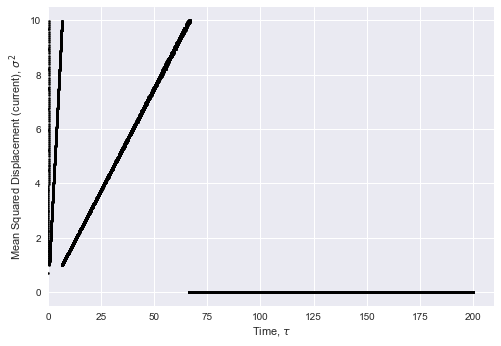

In [9]:
plt.scatter(
    np.arange(parameters.size) * 0.005 + 0.005,
    parameters,
    s=5,
    color='black'
);
plt.xlabel(r'Time, $\tau$');
plt.ylabel(PARAMETERS[parameter_name][1]);
plt.xlim(left=0);
plt.ylim(
#     bottom=2.75, 
#     top=2.85,
);